# HOMEWORK 2
For this homework you will have to complete and implement the colour balancing for:
* Gray world algorithm
* Scale-by-max algorithm

You are free to use your own images. Experiment with more images and think about the effect each of the algorithms has on the resulting (balanced) image.

### Colour Balancing
In this notebook we will show different type of colour balancing making use of von Kries' hypothesis.

In [49]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

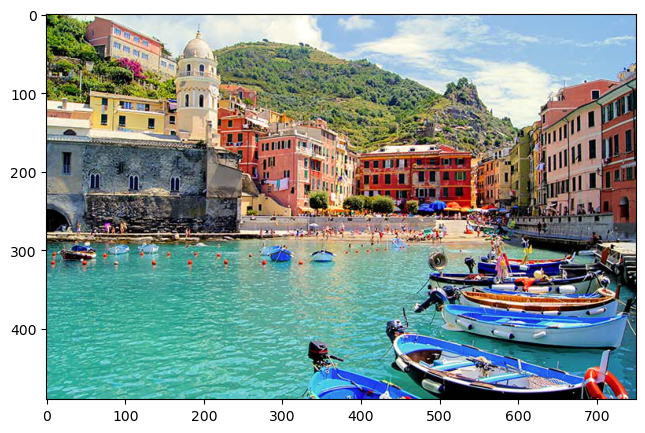

In [50]:
img = cv2.imread('5-things-italy.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### White patch
In white patch algorithm we choose a group of pixels we know they should be white. We then scale the resulting image colour channels by this white patch.

(<Axes: >, <matplotlib.image.AxesImage at 0x16323dc90>)

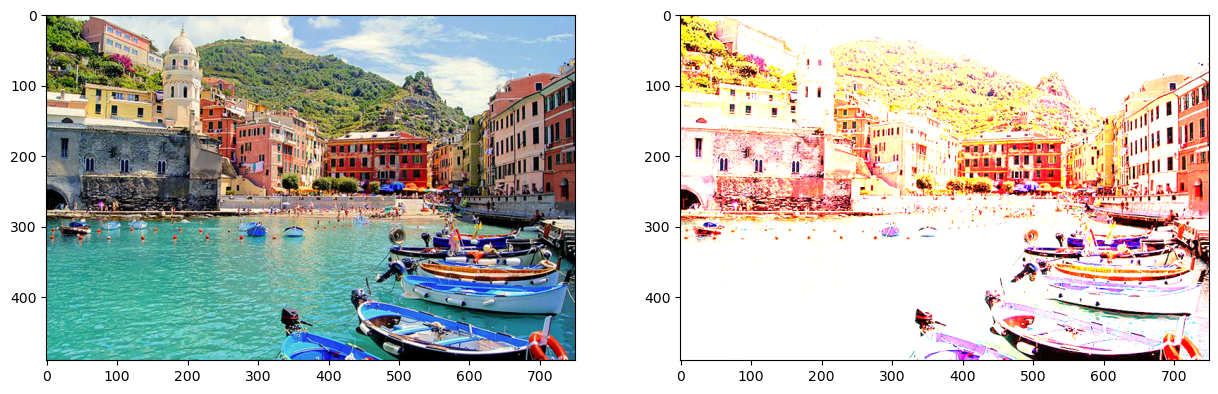

In [51]:
# Define white patch and the coefficients
row, col = 489, 749 
white = img[row, col, :]
coeffs = 255.0/white

# Apply white balancing and generate balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)



### Gray world
This algorithm assumes that a scene, on average, is gray.

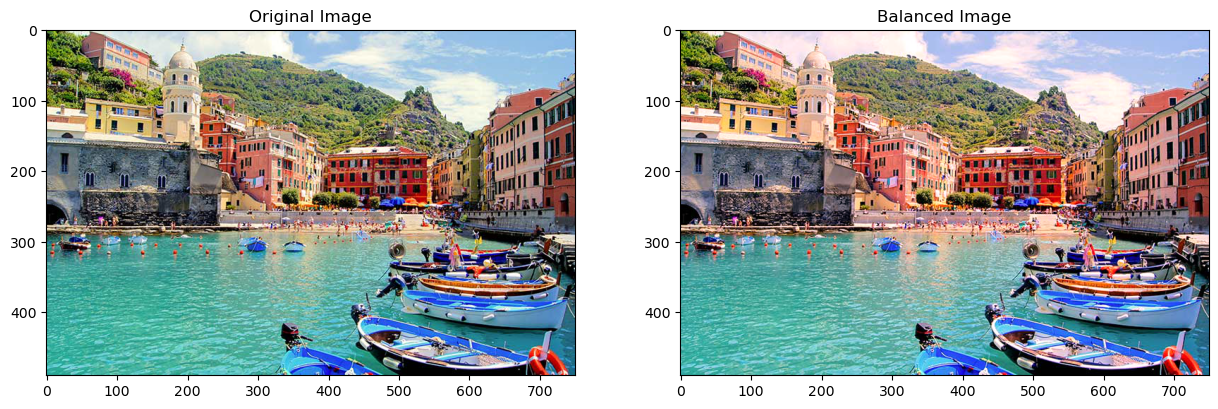

In [52]:

# Load your image
img = cv2.imread('5-things-italy.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the mean values for all three colour channels (red, green, blue)
mean_r = np.mean(img[:, :, 0])
mean_g = np.mean(img[:, :, 1])
mean_b = np.mean(img[:, :, 2])

# Compute the coefficients kr, kg, kb
# Fix the coefficient of the brightest colour channel to 1
brightest_mean = max(mean_r, mean_g, mean_b)

if brightest_mean == mean_r:
    kr = 1
    kg = mean_r / mean_g
    kb = mean_r / mean_b
elif brightest_mean == mean_g:
    kg = 1
    kr = mean_g / mean_r
    kb = mean_g / mean_b
else:  # brightest_mean == mean_b
    kb = 1
    kr = mean_b / mean_r
    kg = mean_b / mean_g

# Apply color balancing and generate the balanced image
balanced = np.zeros_like(img, dtype=np.float32)
balanced[:, :, 0] = img[:, :, 0] * kr
balanced[:, :, 1] = img[:, :, 1] * kg
balanced[:, :, 2] = img[:, :, 2] * kb

# Clip the values to be in the valid range [0, 255]
balanced = np.clip(balanced, 0, 255).astype(np.uint8)

# Show the original and the balanced image side by side
plt.subplot(121), plt.imshow(img)
plt.title('Original Image')
plt.subplot(122), plt.imshow(balanced)
plt.title('Balanced Image')
plt.show()



### Scale-by-max
This is a straightforward algorithm that scales each colour channel by its maximum value. Note that it is sensitive to noise and saturations.

Max R: 255, Max G: 226, Max B: 246
Scale factors - R: 1.0, G: 1.1283185840707965, B: 1.0365853658536586


(<Axes: >, <matplotlib.image.AxesImage at 0x1632a1a90>)

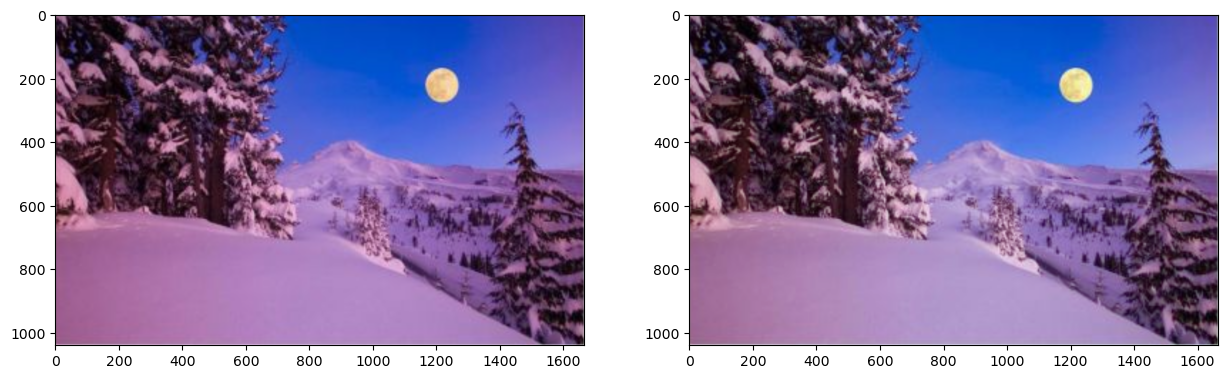

In [53]:
# Load your image
img = cv2.imread('im.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the maximum values for all three colour channels (red, green, blue)
max_r = np.max(img[:, :, 0])
max_g = np.max(img[:, :, 1]) 
max_b = np.max(img[:, :, 2]) 
print(f"Max R: {max_r}, Max G: {max_g}, Max B: {max_b}")

# Apply scale-by-max balancing and generate the balanced image
balanced = np.zeros_like(img, dtype=np.float32)
balanced[:, :, 0] = img[:, :, 0] * (255 / max_r)
balanced[:, :, 1] = img[:, :, 1] * (255 / max_g)
balanced[:, :, 2] = img[:, :, 2] * (255 / max_b)

print(f"Scale factors - R: {255 / max_r}, G: {255 / max_g}, B: {255 / max_b}")

balanced = np.clip(balanced, 0, 255).astype(np.uint8)

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)